# WEB SCRAPING WITH BEAUTIFULSOUP AND SPACY

We will start by sending a request to the url page.

In [1]:
import requests
from bs4 import BeautifulSoup

# URL of the page to scrape
url = 'https://www.poetryfoundation.org/articles/category/interview'

# Send a request to the page
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Find all <a> tags that contain links to articles
article_links = soup.find_all('a', href=True)

# Filter out links that do not lead to articles
filtered_links = [link['href'] for link in article_links if '/articles/' in link['href']]

print(filtered_links)


['https://www.poetryfoundation.org/articles/category/essays', 'https://www.poetryfoundation.org/articles/category/interview', 'https://www.poetryfoundation.org/articles/category/profile', 'https://www.poetryfoundation.org/articles/browse', 'https://www.poetryfoundation.org/articles/category/essays', 'https://www.poetryfoundation.org/articles/category/interview', 'https://www.poetryfoundation.org/articles/category/profile', 'https://www.poetryfoundation.org/articles/browse', 'https://www.poetryfoundation.org/articles/browse', 'https://www.poetryfoundation.org/articles/category/essays', 'https://www.poetryfoundation.org/articles/category/interview', 'https://www.poetryfoundation.org/articles/category/profile', 'https://www.poetryfoundation.org/articles/category/poem-sampler', 'https://www.poetryfoundation.org/articles/category/prose-from-pm', 'https://www.poetryfoundation.org/articles/category/poem-guides', 'https://www.poetryfoundation.org/articles/category/essay-poetic-theory', 'https:

Next, we will scrape from the website the title, the interviewer, and the content of the interview.

In [14]:
import requests
from bs4 import BeautifulSoup
import time

base_url = 'https://www.poetryfoundation.org'
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}

for article_link in filtered_links:
    full_url = base_url + article_link if not article_link.startswith('http') else article_link
    try:
        article_response = requests.get(full_url, headers=headers)
        article_response.raise_for_status()
        article_soup = BeautifulSoup(article_response.content, 'html.parser')

        title_tag = article_soup.find('h2')
        title = title_tag.get_text(strip=True) if title_tag else 'Title Not Found'

        interviewer_tag = article_soup.find('span', class_='c-txt c-txt_attribution')
        interviewer = interviewer_tag.get_text(strip=True) if interviewer_tag else 'Interviewer Not Found'

        content_tags = article_soup.find_all('div', class_="c-feature-bd")
        content = ' '.join([tag.get_text(strip=True) for tag in content_tags]) if content_tags else 'Content Not Found'

        print(f"Title: {title}")
        print(f"Interviewer: {interviewer}")
        print(f"Content: {content}")
        print("\n--- End of Article ---\n")

    except requests.HTTPError as e:
        print(f"HTTP Error: {e}")
    except requests.RequestException as e:
        print(f"Error: {e}")
    except Exception as e:
        print(f"An error occurred: {e}")

Title: 2023: Poetry's Year in Prose
Interviewer: By The Editors
Content: A reading list of our 2023 features. How Robert Frost made poetry modern. Christian Wiman'sZero at the Boneblends memoir and theology, criticism and poetry into a mystical commonplace book for Armageddon. Modernism at the 1913 Armory Show Architecture and Planning in Chicago Harriet Monroe on the Artist’s Audience A new biography of Jane Kenyon frees the poet from the shadow of her famous older husband. Brian Teare'sPoem Bitten by a Manis a hybrid book that presses language into and against visual art. A new edition of Tomas Tranströmer’s collected works showcases his wild associative leaps. Four hundred unruly, obsessive, baffling years of Shakespeare’s First Folio.

--- End of Article ---

Title: Following the Impulse of the Brush
Interviewer: By Arthur Sze
Content: A conversation with Kimiko Hahn, winner of the 2023 Ruth Lilly Poetry Prize. Stephanie McCarter on her feminist translation of Ovid. The DeafBlind p

Title: Margaret Walker’s “For My People”
Interviewer: By CM Burroughs
Content: There is lightness within these downtrodden lives! What does it mean if a poem is “neither pro nor con abortion”? A hymn to female independence in the form of a withering critique of marriage Who are all these people? Where is this waste land they inhabit? What is this chaos of impressions we are privy to? Wherefore such madness? Are these pieces translations, inventions, or interventions that add to a story that has been lost to us? A queer childhood and the demand to “sound straight.” When polite prejudice makes for scathing satire. A letter, a list, a sonnet, and the state of a nation. Bridging two languages and generations in one intricate poem. This short poem about dreams is one of the most influential poems of the 20th century.

--- End of Article ---

Title: Cracks in the Oracle Bone: Teaching Certain Contemporary Poems
Interviewer: Interviewer Not Found
Content: I’m thrilled to be presenting a lectu

Title: Ovid
Interviewer: ByLily Meyer
Content: Lily Meyer is a writer, translator, and critic. Her translations include Claudia Ulloa Donoso’s story collectionsLittle Bird(Deep Vellum, 2021) andIce for Martians(Sundial House, 2022). Her first novel,Short War, is forthcoming from A Strange Object in 2024. Her short fiction has appeared inCatapult, theDrift, theMasters Review, theSewanee Review,... Publius Ovidius Naso, known as Ovid, was born in Sulmo, Italy on March 20, 43 BCE. Considered to be one of the most influential poets in Western literary tradition, Ovid wrote several important... A literary critic, translator, biographer, and editor, Horace Gregory was born in Milwaukee, Wisconsin, and lived in New York for many years. His poetry collections includeChelsea Rooming House(1930);... Not much is known about Homer, or if he even existed, but he is culturally conjured as a blind Greek oral poet who lived in either 9th or 8th century... Horace (Quintus Horatius Flaccus) was a Roman 

Title: Courtney Faye Taylor
Interviewer: ByAmaud Jamaul Johnson
Content: Born and raised in Compton, California, poet Amaud Jamaul Johnson was educated at Howard University and Cornell. His debut collection,Red Summer(2006), examines the infamous race riots of 1919, during which nearly a hundred African American men in cities across the country were lynched. The book won the 2004... Courtney Faye Taylor (she/her) is a writer and visual artist. She is the author ofConcentrate(Graywolf Press, 2022), winner of the 2021 Cave Canem Poetry Prize and the 2023... On today’s episode ofVS, Brittany and Ajanae interview Courtney Faye Taylor about their award winning collectionConcentrate. Listen in as they discuss writing with an ethic of care, studying... Rachel Eliza Griffiths is a multimedia artist, poet, and novelist. Her collection of poetry and photographySeeing the Body(W.W. Norton, 2020) was selected as the winner of the 2021...  Kamilah Aisha Moon was the author of the poetry collections

Title: Rio Cortez
Interviewer: ByJ. Howard Rosier
Content: J. Howard Rosier's work has appeared inTheNew York Times,The Atlantic,The Nation, and more. He is a board member of the National Book Critics Circle. Rio Cortez is the author ofGolden Ax(Penguin Poets, 2022), as well as the picture bookThe ABCs of Black History(Workman, 2020). Her chapbookI Have Learned to Define a Field As... Gwendolyn Brooks is one of the most influential and widely read 20th-century American poets. The author of more than 20 books, she was highly regarded even during her lifetime and... Herman Poole Blount (Sun Ra) was born and raised in Alabama became involved in the jazz scene in Chicago after World War II. He abandoned his birth name, taking the...

--- End of Article ---

Title: Rio Cortez
Interviewer: ByJ. Howard Rosier
Content: J. Howard Rosier's work has appeared inTheNew York Times,The Atlantic,The Nation, and more. He is a board member of the National Book Critics Circle. Rio Cortez is the author of

Title: Patricia Smith
Interviewer: BySaeed Jones
Content: Saeed Jones was born in Memphis and raised in Lewisville, Texas. His poems often examine race, desire, power, and grief, and incorporate mythology as well as what he calls “black iconography.” In a 2014 interview for PEN America, Jones stated, “I’m obsessed with manhood as a brutal and artful performance.... Patricia Smith (she/her) has been called “a testament to the power of words to change lives.” She is the author ofUnshuttered(Northwestern University Press, 2023),Incendiary Art(Northwestern University Press,... The 2021 Pegasus Awards Ceremony celebrated winners of the Poetry Foundation’s annual awards, including: Patricia Smith as winner of the 2021 Ruth Lilly Poetry Prize, Susan Briante as winner of... By Patricia Smith This installation, created by artist and designer Bob Faust, rejoices in the poems of Patricia Smith and invites you to recall our connectedness and partake in healing.
Smith, who was raised... By Patricia

Title: Harriet Monroe, Art Critic
Interviewer: By Mark Pohlad
Content: Reading the visual in theChicago Daily Tribune Gjertrud Schnackenberg’s best poems play form against theme, and then some. Bianca Stone, Ruth Stone’s granddaughter, charts her own poetic territory Leigh Stein’s blinkering, connected verse Omar Pérez is an island unto himself. A doctor’s grim prognosis gave Timothy Donnelly a new outlook on life—and poetry. Martín Espada looks for poetic life outside the MFA universe. The surrealist adventurer of Stockton, California. Can two women write like one man? Tacoma, Washington's reclusive genius.

--- End of Article ---

Title: 2023: Poetry's Year in Prose
Interviewer: By The Editors
Content: A reading list of our 2023 features. How Robert Frost made poetry modern. Christian Wiman'sZero at the Boneblends memoir and theology, criticism and poetry into a mystical commonplace book for Armageddon. Reading the visual in theChicago Daily Tribune

--- End of Article ---



Lastly, to organize the corpus, we will convert the file to csv.

In [16]:
import pandas as pd

# Create lists to store data
titles = []
interviewers = []
contents = []

# Read data from the text file
with open('scraped_articles.txt', 'r', encoding='utf-8') as file:
    current_article = {'Title': '', 'Interviewer': '', 'Content': ''}
    for line in file:
        line = line.strip()
        if line.startswith("Title: "):
            current_article['Title'] = line.replace("Title: ", "").strip()
        elif line.startswith("Interviewer: "):
            current_article['Interviewer'] = line.replace("Interviewer: ", "").strip()
        elif line.startswith("Content: "):
            current_article['Content'] += line.replace("Content: ", "").strip() + " "
        elif line == "--- End of Article ---":
            
            if current_article['Content']:
                titles.append(current_article['Title'])
                interviewers.append(current_article['Interviewer'])
                contents.append(current_article['Content'].strip())
            
            current_article = {'Title': '', 'Interviewer': '', 'Content': ''}

# Create a DataFrame
df = pd.DataFrame({'Title': titles, 'Interviewer': interviewers, 'Content': contents})

# Save the DataFrame as a CSV file
df.to_csv('corpus_data.csv', index=False)


In [19]:
# Load the CSV file into a DataFrame
df = pd.read_csv('corpus_data.csv')

# Display the DataFrame
df


,Title,Interviewer,Content
0,2023: Poetry's Year in Prose,By The Editors,A reading list of our 2023 features. How Rober...
1,Following the Impulse of the Brush,By Arthur Sze,"A conversation with Kimiko Hahn, winner of the..."
2,"Harriet Monroe, Art Critic",By Mark Pohlad,Reading the visual in theChicago Daily Tribune...
3,2023: Poetry's Year in Prose,By The Editors,A reading list of our 2023 features. How Rober...
4,2023: Poetry's Year in Prose,By The Editors,A reading list of our 2023 features. How Rober...
5,Following the Impulse of the Brush,By Arthur Sze,"A conversation with Kimiko Hahn, winner of the..."
6,"Harriet Monroe, Art Critic",By Mark Pohlad,Reading the visual in theChicago Daily Tribune...
7,2023: Poetry's Year in Prose,By The Editors,A reading list of our 2023 features. How Rober...
8,2023: Poetry's Year in Prose,By The Editors,A reading list of our 2023 features. How Rober...
9,2023: Poetry's Year in Prose,By The Editors,A reading list of our 2023 features. How Rober...


___

## Dataset
### *The Pudding*'s Film Dialogue Data

The dataset that we're working with in this lesson is taken from Hannah Andersen and Matt Daniels's *Pudding* essay, ["Film Dialogue from 2,000 screenplays, Broken Down by Gender and Age"](https://pudding.cool/2017/03/film-dialogue/). The dataset provides information about 2,000 films from 1925 to 2015, including characters’ names, genders, ages, how many words each character spoke in each film, the release year of each film, and how much money the film grossed. They included character gender information because they wanted to contribute data to a broader conversation about how "white men dominate movie roles."

___

## Import Pandas

To use the Pandas library, we first need to `import` it.

In [10]:
import pandas as pd

## Change Display Settings

By default, Pandas will display 60 rows and 20 columns. I often change [Pandas' default display settings](https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html) to show more rows or columns.

In [6]:
pd.options.display.max_rows = 200

## Get Data

In [9]:
film_df = pd.read_csv('../Pudding-Film-Dialogue-Clean.csv', delimiter=",", encoding='utf-8')

FileNotFoundError: [Errno 2] No such file or directory: '../Pudding-Film-Dialogue-Clean.csv'

This creates a Pandas [DataFrame object](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#DataFrame) — often abbreviated as *df*, e.g., *slave_voyages_df*. A DataFrame looks and acts a lot like a spreadsheet. But it has special powers and functions that we will discuss in the next few lessons.

## Overview

To look at a random *n* number of rows in a DataFrame, we can use a method called `.sample()`.

In [ ]:
film_df.sample(10)

Generate information about all the columns in the data 

In [ ]:
film_df.info()

Just like Python has different data types, Pandas has different data types, too. These data types are automatically assigned to columns when we read in a CSV file. We can check these Pandas data types with the [`.dtypes` method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html).



| **Pandas Data Type** |  **Explanation**                                                                                   |
|:-------------:|:---------------------------------------------------------------------------------------------------:|
| `object`         | string                                                                               |
| `float64`         | float                                               |
| `int64`       | integer                                                        |
| `datetime64`       |  date time              

Make a histogram of the DataFrame

In [ ]:
film_df.hist(figsize=(10,10))

Generate descriptive statistics for all the columns in the data 

In [ ]:
film_df.describe(include='all')

### ❓ What patterns or outliers do you notice?

## Drop Rows

In [ ]:
film_df[film_df['age'] > 100]

If you want to double check, you can examine the [data that the Pudding shared here](https://github.com/matthewfdaniels/scripts/blob/graphs/character_list5.csv) (you can control + F to search for specific characters).

In [602]:
film_df = film_df.drop(film_df[film_df['age'] > 100].index) 

In [ ]:
film_df

In [605]:
film_df[film_df['age'] > 100]

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id


## Rename Columns

In [67]:
film_df = film_df.rename(columns={'imdb_character_name': 'character', 'year': 'release_year'})

In [ ]:
film_df.head()

## Filter

<div class="admonition note" name="html-admonition" style="background: lightblue; padding: 10px">
Group work!
</div>

Find a specific film that you're intersted and then filter the DataFrame for only rows relevant to that film. 

If you want to search for films by decade and genre, you can [search the with the Pudding's handy data viz here](https://pudding.cool/2017/03/film-dialogue/embed.html).

In [179]:
film_filter = ...

If you want to sort by characters who speak the most, feel free to add `.sort_values(by='words', ascending=False)`

In [ ]:
film_df[film_filter]

Now pick a character from this film (or another character) and filter the DataFrame by character.

In [179]:
character_filter = ...

In [ ]:
film_df[character_filter]

### ❓ How does this data align with your experience/knowledge of the film?
### ❓ How do these specific examples influence your thoughts about the data collection and categorization process? What would you have done differently (if anything)?

## Sort Values

<div class="admonition note" name="html-admonition" style="background: lightblue; padding: 10px">
Group work!
</div>

Sort the DataFrame from the character who has the highest `proportion_of_dialogue` to the lowest.  Then examine the first 20 rows with `.head(20)` or `[:20]`.

In [ ]:
film_df...

Sort the DataFrame from the character who has the lowest `proportion_of_dialogue` to the highest. Then examine the first 20 rows with `.head(20)` or `[:20]`.

In [ ]:
film_df...

Sort the DataFrame from the character who speaks the least number of `words` to the character who speaks the most number of words. Then examine the first 20 rows with `.head(20)` or `[:20]`.

In [ ]:
film_df...

### ❓ What patterns do you notice here? What surprises you or doesn't surprise you?

## Groupby

Group by film and then calculate the sum total for every column.

In [ ]:
film_df.groupby...

Group by film, isolate the `words` column, and then calculate the sum total for every column.

In [ ]:
film_df.groupby...

Group by film AND gender, isolate the column `words`, and then calculate the sum total for every column.

*Note: Remember that to group by multiple columns, you need to put the column names in square brackets `[]`.*

In [ ]:
film_df.groupby...

## Filter, Then Groupby

<div class="admonition note" name="html-admonition" style="background: lightblue; padding: 10px">
Group work!
</div>

Filter the DataFrame for only characters labeled as `woman`

In [6]:
women_filter = film_df['gender'] == 'woman'

In [7]:
women_film_df = film_df[women_filter]

Filter the DataFrame for only characters labeled as `man`

In [8]:
men_filter = film_df['gender'] == 'man'

In [9]:
men_film_df = film_df[men_filter]

Now group `women_film_df` by film, isolate the `words` column, and sum the `words` spoken by women.

In [10]:
women_film_df.groupby('title')['words'].sum()

title
(500) Days of Summer          5738
10 Things I Hate About You    8992
12 Years a Slave              3452
12 and Holding                5324
127 Hours                      809
                              ... 
Zero Effect                   2216
Zerophilia                    4612
Zodiac                        1421
eXistenZ                      3752
xXx                            998
Name: words, Length: 1940, dtype: int64

Assign this Series to a new variable `women_by_film`

In [11]:
women_by_film = women_film_df.groupby('title')['words'].sum()

Using the same construction, make a new another new variable `men_by_film`

In [12]:
men_by_film = men_film_df.groupby('title')['words'].sum()

Sort `women_by_film` from the film with the most words to the film with the least words. Then examine the top 20 values.

In [ ]:
women_by_film.sort_values(ascending=False)[:20]

Assign this sorted list of movies to the variable `top20_women`

In [435]:
top20_women = women_by_film.sort_values(ascending=False)[:20]

Using the same construction, make a new variable `top20_men`

In [436]:
top20_men = men_by_film.sort_values(ascending=False)[:20]

### ❓ What patterns do you notice here? What surprises you or doesn't surprise you?

## Saving Plots

<div class="admonition note" name="html-admonition" style="background: lightblue; padding: 10px">
Group work!
</div>

Make a bar chart of `top20_women`. Give the chart a title, and specify a color.

In [ ]:
top20_women.plot(kind='bar')

To save the plot, you can use `ax.figure.savefig()` and the name of the file in quotation marks.

In [ ]:
ax = top20_women.plot(kind='bar')
ax.figure.savefig('top20_women.png')

Look in the file browser on the left and double click the PNG file. How does it look? Uh oh!

Sometimes parts of a plot will get cut off when you save it. To fix this issue, you can use a function from the Matplotlib library called `plt.tight_layout()`, which will adjust the plot before you save it.

To use this function, you need to `import matplotlib.pyplot as plt`.

In [ ]:
import matplotlib.pyplot as plt

ax = top20_women.plot(kind='bar')
plt.tight_layout()
ax.figure.savefig('top20_women.png')

## Scatter Plots and Line Plots

Let's make a scatter plot that shows how many words women and men speak based on their age.

In [ ]:
women_film_df.groupby('age')['words'].sum().reset_index()

In [14]:
women_age_words = women_film_df.groupby('age')['words'].sum().reset_index()

In [15]:
men_age_words = men_film_df.groupby('age')['words'].sum().reset_index()

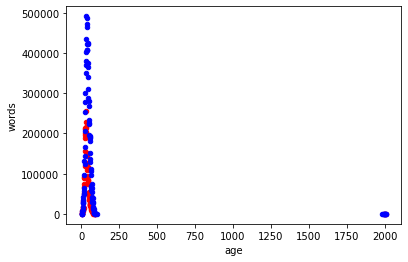

In [16]:
ax = women_age_words.plot(kind='scatter', x='age', y='words', color='red')
men_age_words.plot(ax=ax, kind='scatter', x='age', y='words', color='blue')

Now let's make a line plot of the exact same data. Copy and paste the code in the cell above and change it to produce a line plot instead of a scatter plot.

<div class="admonition note" name="html-admonition" style="background: lightblue; padding: 10px">
Group work!
</div>

In [645]:
# Your code here
# Your code here

If there is anything wrong, please open [an issue on GitHub](https://github.com/GroningenDH/Cultural-Analytics-Open-Science-Guide/issues) or email f.pianzola@rug.nl